# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [12]:
!pip install psycopg2
!pip install --user seaborn
!pip install --user pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Importando bibliotecas

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

### Usando psycopg2 para configurar conexão

In [14]:
conn = psycopg2.connect(host="localhost", port="5432", database="FE", user="postgres", password="2836417")

# Relatório 1

### VIEW PESSOA JURÍDICA
Objetivo: Juntar as informações de pessoa com pessoa juridica

Código para obtenção do resultado:

In [15]:
result1 = pd.read_sql_query("""
        select jur.id, jur.cnpj, pes.nome from pessoa_juridica as jur
        inner join pessoa as pes on jur.fk_pessoa_id = pes.id limit 10;
""",conn)

In [16]:
result1

,id,cnpj,nome
0,1,zlurb-cnpj,qzefs-nome
1,2,owwqi-cnpj,xzimh-nome
2,3,pwrgv-cnpj,vnkyn-nome
3,4,tyyny-cnpj,ciibg-nome
4,5,yxbuv-cnpj,enpzj-nome
5,6,beogk-cnpj,rpnup-nome
6,7,yiwwj-cnpj,klkjm-nome
7,8,tewve-cnpj,bosqy-nome
8,9,riftu-cnpj,mtesk-nome
9,10,iblvn-cnpj,bkwmf-nome


# Relatório 2

### VIEW PESSOA FÍSICA 
Objetivo: Juntar as informações de pessoa com pessoa física

codigo para obtenção do resultado:

In [17]:
result = pd.read_sql_query("""
            select fis.id, fis.cpf, pes.nome from pessoa_fisica as fis
            inner join pessoa as pes on fis.fk_pessoa_id = pes.id limit 10;
                            """,conn)

In [18]:
result

,id,cpf,nome
0,1,rndyczwyeo-cpf,ptvwq-nome
1,2,ahvtwyhuer-cpf,gtzwr-nome
2,3,ljosbaowxp-cpf,bkkya-nome
3,4,qwquhxerje-cpf,ttzul-nome
4,5,stymfuduai-cpf,jhwbv-nome
5,6,ftydqpatik-cpf,bupcy-nome
6,7,pskdlwsayg-cpf,chelf-nome
7,8,quiyncwqke-cpf,xqutz-nome
8,9,xekrrqbtgm-cpf,gwulx-nome
9,10,vvfsikduhz-cpf,gffnm-nome


Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

In [19]:
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)


,id,cpf,nome
0,1,rndyczwyeo-cpf,ptvwq-nome
1,2,ahvtwyhuer-cpf,gtzwr-nome
2,3,ljosbaowxp-cpf,bkkya-nome
3,4,qwquhxerje-cpf,ttzul-nome
4,5,stymfuduai-cpf,jhwbv-nome
5,6,ftydqpatik-cpf,bupcy-nome
6,7,pskdlwsayg-cpf,chelf-nome
7,8,quiyncwqke-cpf,xqutz-nome
8,9,xekrrqbtgm-cpf,gwulx-nome
9,10,vvfsikduhz-cpf,gffnm-nome


Podemos também utilizar o matplotlib que é instalado por padrão com o seaborn

References

## Relatório 3

### VIEW ESTACIONAMENTO 
Objetivo: tem o objetivo de procurar um cliente pelo cnpj e mostrar todas as informações relacionadas ao estacionamento que são importantes 

codigo para obtenção do resultado:

In [20]:
result = pd.read_sql_query(""" 
select e.id, e.nome, e.latitude, e.longitude, e.valorhora, en.rua, b.bairro, cid.cidade, pes.cnpj, pes.nome as nome_pes from estacionamento as e
inner join endereco as en on e.id = en.id
inner join bairro as b on en.fk_bairro_id = b.id
inner join cidade as cid on b.fk_cidade_id = cid.id
inner join estado as est on cid.fk_estado_id = est.id
inner join pessoa_juridica_info as pes on e.fk_pessoa_juridica_id = pes.id
where pes.cnpj = 'pzpnd-cnpj';
                            """,conn)

In [21]:
result

,id,nome,latitude,longitude,valorhora,rua,bairro,cidade,cnpj,nome_pes
0,148,evvny-nome,2.25,58.72,23.93,zcqpt-rua,xcpbs-bairro,mlbmt-cidade,pzpnd-cnpj,fazfz-nome
1,571,gbsnx-nome,37.86,48.29,25.85,dopwl-rua,pycpu-bairro,rewno-cidade,pzpnd-cnpj,fazfz-nome
2,877,mgxhc-nome,98.02,19.41,6.77,yxrpg-rua,wekal-bairro,qbkoo-cidade,pzpnd-cnpj,fazfz-nome
3,908,hixlm-nome,29.57,35.39,27.72,ojdgu-rua,mmcqx-bairro,kxlye-cidade,pzpnd-cnpj,fazfz-nome
4,978,hzdtk-nome,99.17,10.25,24.08,vvlvq-rua,vdtwk-bairro,zfopw-cidade,pzpnd-cnpj,fazfz-nome


## Relatório 4

### VIEW ESTACIONAMENTO VALOR
tem o objetivo de procurar um cliente pelo cnpj e mostrar todas as informações relacionadas ao estacionamento que possuem um valor hora maior do que e que são importantes para o cliente

codigo para obtenção do resultado:

In [22]:
result = pd.read_sql_query("""
                            select e.id, e.nome, e.latitude, e.longitude, e.valorhora, en.rua, b.bairro, cid.cidade, pes.cnpj, pes.nome as nome_pes from estacionamento as e
inner join endereco as en on e.id = en.id
inner join bairro as b on en.fk_bairro_id = b.id
inner join cidade as cid on b.fk_cidade_id = cid.id
inner join estado as est on cid.fk_estado_id = est.id
inner join pessoa_juridica_info as pes on e.fk_pessoa_juridica_id = pes.id
where pes.cnpj = 'pzpnd-cnpj' and
e.valorhora > 20;;
                            """,conn)

In [23]:
result

,id,nome,latitude,longitude,valorhora,rua,bairro,cidade,cnpj,nome_pes
0,148,evvny-nome,2.25,58.72,23.93,zcqpt-rua,xcpbs-bairro,mlbmt-cidade,pzpnd-cnpj,fazfz-nome
1,571,gbsnx-nome,37.86,48.29,25.85,dopwl-rua,pycpu-bairro,rewno-cidade,pzpnd-cnpj,fazfz-nome
2,908,hixlm-nome,29.57,35.39,27.72,ojdgu-rua,mmcqx-bairro,kxlye-cidade,pzpnd-cnpj,fazfz-nome
3,978,hzdtk-nome,99.17,10.25,24.08,vvlvq-rua,vdtwk-bairro,zfopw-cidade,pzpnd-cnpj,fazfz-nome


### VIEW PAGAMENTO
tem o objetivo de mostrar as informações relacionadas as reservas e pagamentos de uma vaga entre duas datas

codigo para obtenção do resultado:

In [24]:
result = pd.read_sql_query("""
                            select pag.data, pag.valor, res.horaReserva, res.dataReserva, res.horaSaida, res.saidaPrevista, veic.placa, mot.cnh from
pagamento_estacionamento as pag inner join reserva as res on res.fk_pagamento_estacionamento_id = pag.id
inner join veiculo as veic on res.fk_veiculo_id = veic.id
inner join motorista as mot on veic.fk_motorista_id = mot.id
where pag.data > '1980-01-01' and
pag.data < '2000-01-01' limit 11;
                            """,conn)

In [25]:
result

,data,valor,horareserva,datareserva,horasaida,saidaprevista,placa,cnh
0,1986-12-29,17.64,15:17:02,1970-03-02,07:05:52,23:48:47,aa-placa,mzylxmn-cnh
1,1982-06-23,62.88,10:14:24,1986-09-10,23:07:43,10:43:40,ri-placa,vxvuuoq-cnh
2,1982-10-02,29.73,01:00:19,1974-07-02,23:14:59,15:44:40,xx-placa,chexrzc-cnh
3,1982-05-31,93.37,07:35:56,1958-04-20,06:54:10,11:09:25,fl-placa,debwoep-cnh
4,1986-07-03,84.66,03:40:30,1950-07-31,17:09:27,02:32:00,gk-placa,hitbkhf-cnh
5,1986-04-28,2.47,07:26:09,1990-10-02,02:35:17,12:20:19,iq-placa,tvezics-cnh
6,1990-02-17,12.27,14:30:02,1982-10-08,12:52:37,11:50:33,tb-placa,rqceffl-cnh
7,1986-04-26,58.88,06:15:35,1954-10-26,05:11:06,03:18:28,bg-placa,nkiqdqa-cnh
8,1982-10-22,93.93,05:17:19,1982-04-20,19:03:43,17:55:57,bj-placa,umvjzdv-cnh
9,1986-11-15,45.80,07:20:41,1974-04-08,16:58:05,19:05:47,zx-placa,pmvgsrg-cnh


### QUANTIDADE DE RESERVAS POR PERIODO
Um select que gera relatório de quantas reservas foram feitas em um determinado período de hora. Como exemplo temos um período entre as 6-18hrs em uma coluna, e o resto das reservas na segunda coluna.
É uma análise útil para saber os tempos de pico, maior e menor movimentação, ajudando no planejamento do negócio.

In [26]:
result = pd.read_sql_query("""
                            select 
	(case
		when horareserva between '06:00:00' and '18:00:00' then 'DIA'
		else 'NOITE' end) as periodo,
		count(*)
from reserva
group by periodo;
                            """,conn)

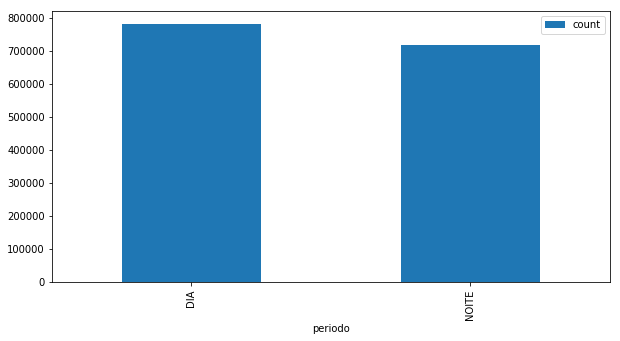

In [27]:
result.plot(kind='bar', x='periodo', figsize=(10,5))

### PAGAMENTO ENTRE AS FAIXAS 0-50 E 50+
Um select que gera um relatório de valores de pagamento. No exemplo a seguir temos uma coluna com os pagamentos até 50 reais e na segunda coluna temos os pagamentos de 50 até 100 reais.

Tal relatório é útil para se ter uma ideia dos valores que os clientes estão pagando, ter uma ideia melhor dos preços dos estacionamentos, e poder também fazer análises estatístias.

In [28]:
result = pd.read_sql_query("""
                            select
	(case
		when valor between 0.00 and 50.00 then 'valor_1'
	 	when valor between 50.01 and 100.00 then 'valor_2' end) as faixa,
	count(*)
from pagamento_info
group by faixa;
                            """,conn)

In [29]:
result

,faixa,count
0,valor_1,184217
1,valor_2,190710


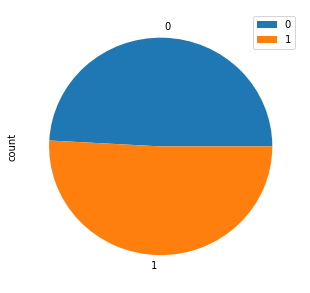

In [30]:
result.plot.pie(x='faixa', y='count', figsize=(5,5))

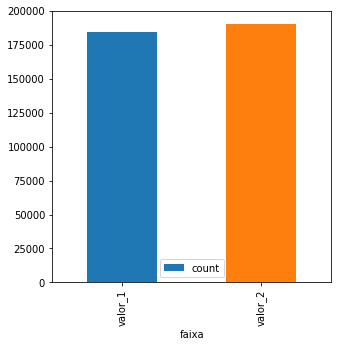

In [31]:
result.plot(kind='bar', x='faixa', y='count', figsize=(5,5))

### VIEW FUNCIONÁRIO
Essa view demonstra, à partir do id, as informações de um funcionário: cargo, nome, matricula, nome da empresa e o cpnj dela.
Assim, podemos ver quantos e quais funcionários cada empresa possui.

In [32]:
result = pd.read_sql_query("""
select p.nome, f.matricula, c.nome as cargo, pj.nome as empresa_nome, pj.cnpj as empresa_cnpj
from pessoa_fisica_info as p inner join funcionario as f
on f.fk_pessoa_fisica_id = p.id 
inner join cargo as c
on f.fk_cargo_id = c.id 
inner join pessoa_juridica_info as pj
on f.fk_pessoa_juridica_id = pj.id;
                            """,conn)

In [33]:
result

,nome,matricula,cargo,empresa_nome,empresa_cnpj
0,kbylm-nome,huglc-matricula,cargo1,ujkpu-nome,gdasf-cnpj
1,nazpr-nome,cqesk-matricula,cargo2,ujkpu-nome,gdasf-cnpj
2,nppmy-nome,bdmow-matricula,cargo1,oitep-nome,spjes-cnpj
3,bybrk-nome,tqwqf-matricula,cargo3,oitep-nome,spjes-cnpj
4,ywrzp-nome,upclv-matricula,cargo2,oitep-nome,spjes-cnpj
5,pptio-nome,xspac-matricula,cargo2,tuinb-nome,metio-cnpj
6,qagwp-nome,czmfl-matricula,cargo3,tuinb-nome,metio-cnpj
7,annns-nome,mgxyn-matricula,cargo2,tuinb-nome,metio-cnpj
8,fuocs-nome,rotzb-matricula,cargo2,tuinb-nome,metio-cnpj
9,zmaxl-nome,bwjpc-matricula,cargo3,tuinb-nome,metio-cnpj


### Quantidade total de cada cargo
reaproveitando o código anterior, podemos verificar o total de funcionários em cada cargo, somando todas as empresas.

In [54]:
result = pd.read_sql_query("""
select c.nome as cargo,
count(*) as quantidade
from pessoa_fisica_info as p inner join funcionario as f
on f.fk_pessoa_fisica_id = p.id 
inner join cargo as c
on f.fk_cargo_id = c.id 
inner join pessoa_juridica_info as pj
on f.fk_pessoa_juridica_id = pj.id
group by c.nome;
                            """,conn)

In [56]:
result

,cargo,quantidade
0,cargo2,1013
1,cargo1,512
2,cargo3,475


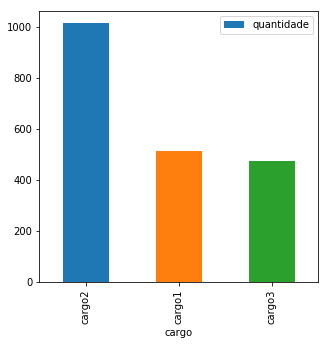

In [57]:
result.plot(kind='bar', x='cargo', y='quantidade', figsize=(5,5))

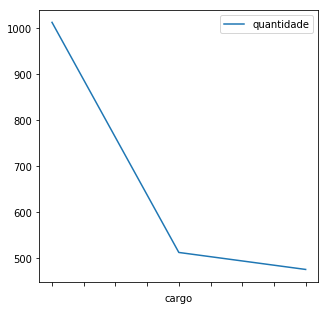

In [59]:
result.plot(x='cargo', y='quantidade', figsize=(5,5))

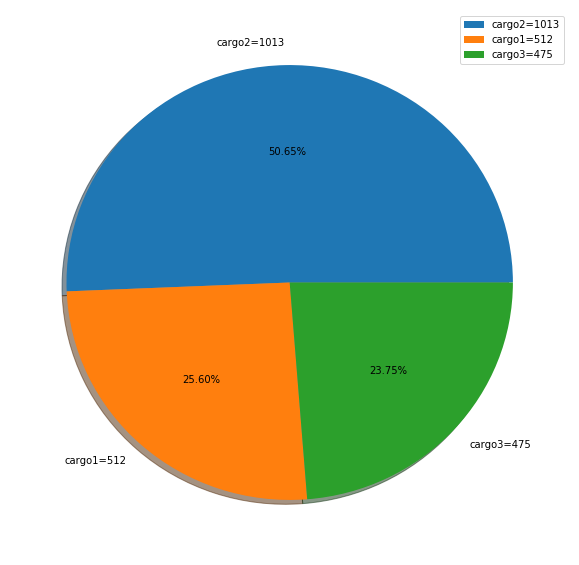

In [66]:
plt.figure(figsize=(10, 10))

labels = [f'{cargo}={num}' for cargo, num in zip(result['cargo'], result['quantidade'])]

plt.pie(x=result['quantidade'], labels=labels, shadow=True, autopct='%1.2f%%')

plt.legend()
plt.show()

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>